# poli

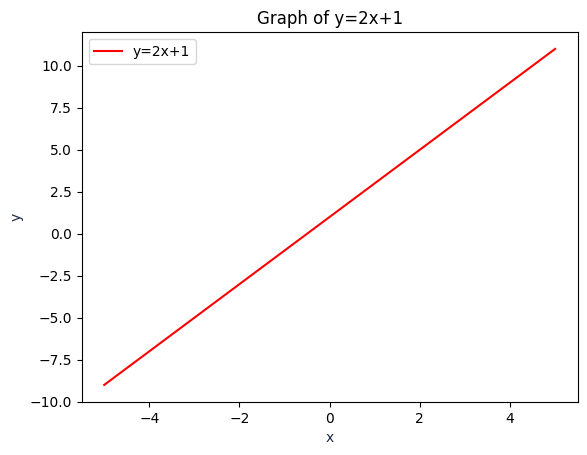

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5,5,100) # min,max,sample
y = 2*x+1
plt.plot(x, y, '-r', label='y=2x+1')
plt.title('Graph of y=2x+1')
plt.xlabel('x', color='#1C2843' )
plt.ylabel('y', color='#1C2843')
plt.legend(loc='upper left')
#plt.grid()
plt.show()

In [2]:
# 100 linearly spaced numbers
import numpy as np
x = np.linspace(-50,50,100)

In [3]:
# the function, which is y = ??? here
y = x**3

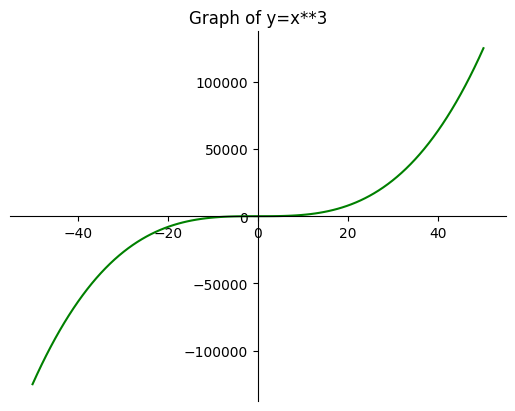

In [4]:
# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # axis

ax.spines['left'].set_position('center') # le spine sono i margini della foto
ax.spines['bottom'].set_position('center') # si spostano per essere gli assi

ax.spines['right'].set_color('none') # margine (destra y) tolto 
ax.spines['top'].set_color('none') # colore none

ax.xaxis.set_ticks_position('bottom') #imposta tacche numeriche
ax.yaxis.set_ticks_position('left')
plt.title('Graph of y=x**3')
plt.plot(x,y, "green")
plt.show()


$$
Chebyshev\ interpolation = \cos\left(\frac{(2k + 1)\pi}{2n}\right), \quad k = 0, 1, \dots, n-1
$$


# trigo

In [5]:
import numpy as np

def chebyshev_nodes(a=-1, b=1 , n=100):
    """Alternative to linspace, da usare quando serve (polinomiali,  kurt> 0 leptocurtica quando le code sono interessanti)"""
    k = np.arange(n)
    x = np.cos((2 * k + 1) * np.pi / (2 * n))  # nodi di Chebyshev su [-1, 1]
    return 0.5 * (a + b) + 0.5 * (b - a) * x  # trasforma su [a, b]

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# 100 linearly spaced numbers
x = np.linspace(-pi,pi,13)
x_cheb= chebyshev_nodes(-pi,pi,13)

In [7]:
y = np.sin(x)
y_cheb = np.sin(x_cheb)

In [8]:
z = np.cos(x)
z_cheb=np.cos(x_cheb)

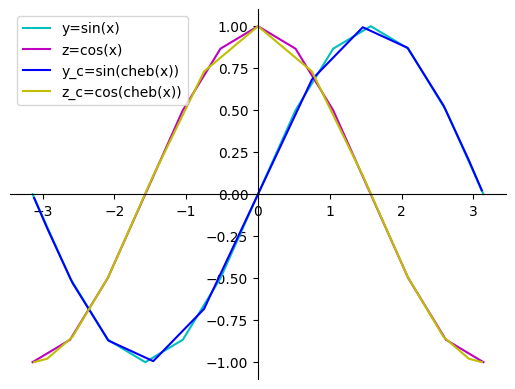

In [9]:
# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the functions
plt.plot(x,y, 'c', label='y=sin(x)')
plt.plot(x,z, 'm', label='z=cos(x)')



plt.plot(x_cheb,y_cheb, 'b', label='y_c=sin(cheb(x))')
plt.plot(x_cheb,z_cheb, 'y', label='z_c=cos(cheb(x))')


plt.legend(loc='upper left')


plt.show()

# exponential 

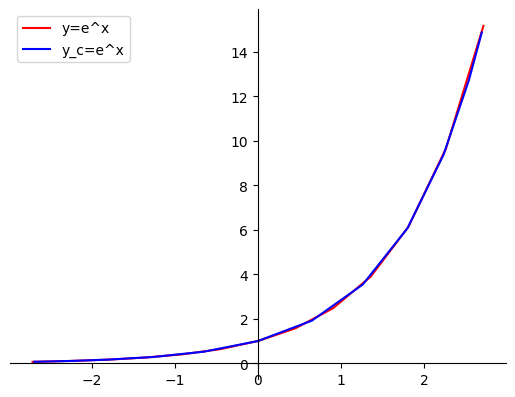

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from math import e


# 100 linearly spaced numbers
x = np.linspace(-e,e,13)
x_cheb= chebyshev_nodes(-e,e,13)

# the function, which is y = e^x here
y = np.exp(x)
y_c = np.exp(x_cheb)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


# plot the function
plt.plot(x,y, 'r', label='y=e^x')

plt.plot(x_cheb,y_c, 'b', label='y_c=e^x')


plt.legend(loc='upper left')

plt.show()

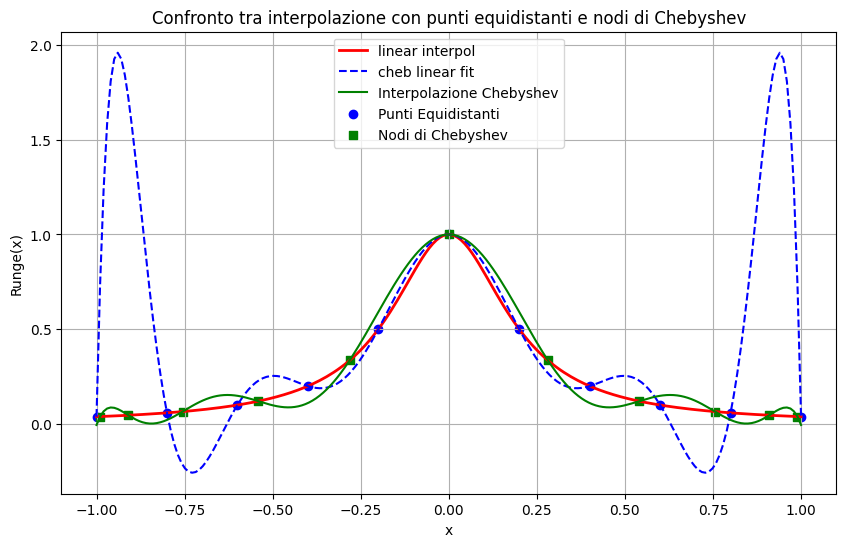

Coefficienti polinomio di Chebyshev lineare:  [ 5.88661712e-01 -5.29278060e-16  3.57428503e-01 -3.39220339e-16
  3.79356971e-01  9.57222418e-17 -4.06670894e-01  3.37708669e-16
 -4.48787914e-01  4.98920157e-16 -4.31526840e-01]
Coefficienti polinomio di Chebyshev interpolato:  [ 2.01135927e-01  8.87626291e-18 -2.74453603e-01 -1.90640320e-16
  1.90547928e-01  1.62486225e-16 -1.37129922e-01 -1.93888916e-16
  1.05652703e-01  1.78116309e-16 -9.10799162e-02]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import chebfit, chebval

def Runge(x):
    return 1 / (1 + 25 * x**2)

# nodi di Chebyshev in [a, b]
def chebyshev_nodes(n, a=-1, b=1):
    k = np.arange(n)
    x = np.cos((2 * k + 1) * np.pi / (2 * n))  # nodi su [-1,1]
    return 0.5 * (a + b) + 0.5 * (b - a) * x  # trasformazione su [a,b]


# interpol lineare
x_plot_lin = np.linspace(-1, 1, 200) # n 200 non sempre abbiamo F(x) o i punti
y_plot_lin = Runge(x_plot_lin)  # funzione


# grado polinomio approssimazione e numero nodi  
n = 11  

# approssimazione lineare
x = np.linspace(-1, 1, n)
y = Runge(x)
coeffs_lin = chebfit(x, y, deg=n-1)   # Fit su punti equidistanti
y_fit_lin = chebval(x_plot_lin, coeffs_lin)  # eval con punti equidistanti

# oscillazioni nei nodi
x_cheb = chebyshev_nodes(n)
y_cheb = Runge(x_cheb)
coeffs_cheb = chebfit(x_cheb, y_cheb, deg=n-1)  # fit su nodi di Chebyshev
y_fit_cheb = chebval(x_plot_lin, coeffs_cheb)  # eval con nodi di Chebyshev

# plot
plt.figure(figsize=(10, 6))
plt.plot(x_plot_lin, y_plot_lin, 'r-', label="linear interpol", linewidth=2)
plt.plot(x_plot_lin, y_fit_lin, 'b--', label="cheb linear fit", linewidth=1.5)
plt.plot(x_plot_lin, y_fit_cheb, 'g-', label="Interpolazione Chebyshev", linewidth=1.5)
plt.scatter(x, y, color='blue', marker='o', label="Punti Equidistanti")
plt.scatter(x_cheb, y_cheb, color='green', marker='s', label="Nodi di Chebyshev")

plt.legend()
plt.xlabel("x")
plt.ylabel("Runge(x)")
plt.title("Confronto tra interpolazione con punti equidistanti e nodi di Chebyshev")
plt.grid(True)
plt.show()
print("Coefficienti polinomio di Chebyshev lineare: ", coeffs_lin)
print("Coefficienti polinomio di Chebyshev interpolato: ", coeffs_cheb) 